# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [37]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [38]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [39]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [40]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
キーエンス
任天堂
中外薬
ＮＴＴ
三井住友ＦＧ
リクルート
伊藤忠
ＫＤＤＩ
東京海上
三菱商
ＳＢＧ
ＳＢ
東エレク
三菱重
みずほＦＧ
ＪＴ
三井物
信越化
ホンダ
武田
第一三共
富士通
キヤノン
ＨＯＹＡ
ＯＬＣ
['7203', '6758', '8306', '6501', '9983', '6861', '7974', '4519', '9432', '8316', '6098', '8001', '9433', '8766', '8058', '9984', '9434', '8035', '7011', '8411', '2914', '8031', '4063', '7267', '4502', '4568', '6702', '7751', '7741', '4661']


In [41]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [42]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,6861,7974,4519,9432,8316,...,2914,8031,4063,7267,4502,4568,6702,7751,7741,4661
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.969175,0.983236,0.984000,0.992379,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.984179,0.988415,0.998713
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.975975,0.999574,0.983333,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,0.994658,1.003673,1.002575
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.027199,1.007387,0.992000,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996507,1.006782,0.996138
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,0.973799,0.989588,1.000426,0.994573,0.982036,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.989727,0.991806,0.984516
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.945819,0.923372,0.965904,0.981683,0.946856,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.954387,0.948290,0.950000
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.936115,0.932049,0.964342,0.980326,0.934132,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.965276,0.931619,0.943226
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935145,0.951685,0.935502,0.968114,0.918413,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.964660,0.930206,0.924677
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.898916,0.920632,0.941611,0.966757,0.847804,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.916992,0.887821,0.919355
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.884522,0.911225,0.945305,0.977612,0.779691,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.880214,0.883865,0.941290


In [43]:
summary

,7203,6758,8306,6501,9983,6861,7974,4519,9432,8316,...,2914,8031,4063,7267,4502,4568,6702,7751,7741,4661
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.969175,0.983236,0.984000,0.992379,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.984179,0.988415,0.998713
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.975975,0.999574,0.983333,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,0.994658,1.003673,1.002575
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.027199,1.007387,0.992000,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996507,1.006782,0.996138
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,0.973799,0.989588,1.000426,0.994573,0.982036,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.989727,0.991806,0.984516
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.945819,0.923372,0.965904,0.981683,0.946856,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.954387,0.948290,0.950000
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.936115,0.932049,0.964342,0.980326,0.934132,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.965276,0.931619,0.943226
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935145,0.951685,0.935502,0.968114,0.918413,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.964660,0.930206,0.924677
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.898916,0.920632,0.941611,0.966757,0.847804,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.916992,0.887821,0.919355
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.884522,0.911225,0.945305,0.977612,0.779691,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.880214,0.883865,0.941290


In [44]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.172184
9433    1.040633
2914    1.039760
7011    1.014866
7974    1.004658
7267    1.003868
9434    1.000941
4661    0.998387
9983    0.994624
9432    0.991181
8001    0.985448
8058    0.968932
6861    0.967006
7203    0.956451
4502    0.953223
6702    0.951749
6501    0.951578
8031    0.936870
8035    0.927265
8766    0.924556
6758    0.915888
7741    0.911274
4568    0.894524
7751    0.881036
4063    0.878021
9984    0.877500
6098    0.876750
8316    0.812375
8306    0.803126
8411    0.782333
Name: 2025-04-24 00:00:00, dtype: float64

In [48]:
list_ranking = df_ranking.index[0:7]
for code in list_ranking:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-22    1.180992
2025-04-23    1.164086
2025-04-24    1.172184
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-22    1.071265
2025-04-23    1.075224
2025-04-24    1.040633
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-22    1.020838
2025-04-23    1.057725
2025-04-24    1.039760
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-04-22    0.951637
2025-04-23    0.994731
2025-04-24    1.014866
Name: Close, dtype: float64

7974 Nintendo Co., Ltd.
2025-04-22    0.929309
2025-04-23    0.951228
2025-04-24    1.004658
Name: Close, dtype: float64

7267 Honda Motor Co., Ltd.
2025-04-22    0.974684
2025-04-23    0.997539
2025-04-24    1.003868
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-22    1.011759
2025-04-23    1.018815
2025-04-24    1.000941
Name: Close, dtype: float64

Median
2025-04-22    0.909500
2025-04-23    0.945933
2025-04-24    0.952486
dtype: float64


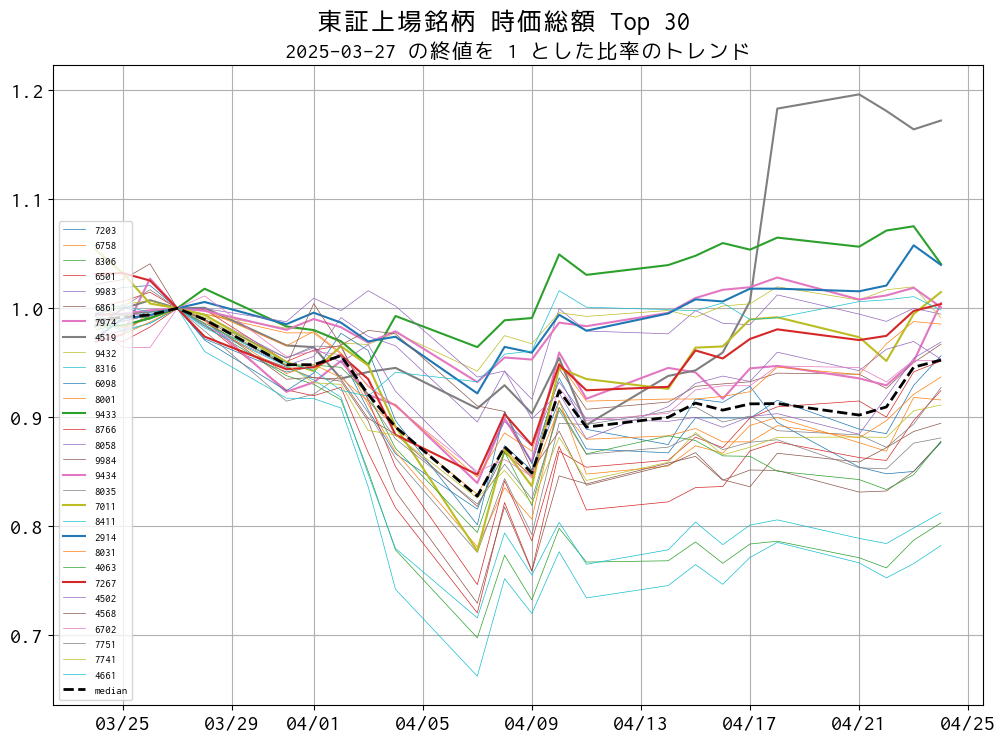

In [49]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    if colname in list_ranking:
        width = 1.5
        lstyle = 'solid'
    else:
        width = 0.5
        lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [47]:
summary.median(axis=1)

2025-03-24    0.988628
2025-03-25    0.991767
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989738
2025-03-31    0.948183
2025-04-01    0.948237
2025-04-02    0.956507
2025-04-03    0.920925
2025-04-04    0.891153
2025-04-07    0.827678
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
2025-04-11    0.890984
2025-04-14    0.899958
2025-04-15    0.913023
2025-04-16    0.906548
2025-04-17    0.912287
2025-04-18    0.912590
2025-04-21    0.902038
2025-04-22    0.909500
2025-04-23    0.945933
2025-04-24    0.952486
dtype: float64